In [2]:
# Importing Libraries

# Data Handling
import pandas as pd
import numpy as np
from collections import defaultdict
from concurrent.futures import ThreadPoolExecutor

# Efficient Looping
import itertools

# Traceback for diagnosis
import traceback

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Statistics & Mathematics
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro, skew, anderson, kstest
import math

# Feature Selection
from sklearn.feature_selection import (
    RFECV, SelectKBest, chi2, f_classif, f_regression,
    mutual_info_classif, mutual_info_regression
)

# Machine Learning Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin,ClassifierMixin

# Preprocessing data
from sklearn.preprocessing import RobustScaler, StandardScaler, QuantileTransformer, FunctionTransformer

from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Model Selection for Cross Validation
from sklearn.model_selection import (
    StratifiedKFold, KFold, 
    RepeatedKFold, RepeatedStratifiedKFold,
    train_test_split, TimeSeriesSplit
)

# Machine Learning metrics
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    cohen_kappa_score,
    make_scorer,
    roc_curve,
    auc,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix
)

# ML regressors
from sklearn.linear_model import HuberRegressor,RANSACRegressor, TheilSenRegressor, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.ensemble import (
    HistGradientBoostingRegressor, StackingRegressor, 
    AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor,
    GradientBoostingRegressor, StackingRegressor, VotingRegressor
    )
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# ML classifiers
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import (
    HistGradientBoostingClassifier, AdaBoostClassifier, 
    RandomForestClassifier, GradientBoostingClassifier,
    StackingClassifier, VotingClassifier,ExtraTreesClassifier
    )
from sklearn.tree import DecisionTreeClassifier
# from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Clustering algorithms
from sklearn.cluster import KMeans

# Fine-tuning 
import optuna

# Randomizer
import random

# Encoder of categorical variables
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# OS
import os

# Image package
from PIL import Image

# Hiding warnings 
import warnings
warnings.filterwarnings("ignore")

c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [3]:

# Importing Keras 
from keras.models import Sequential                          # Neural network model as a sequence of layers.
from keras.layers import Conv2D                              # Convolutional layer
from keras.layers import MaxPooling2D                        # Max pooling layer 
from keras.layers import Flatten                             # Layer used to flatten 2D arrays for fully-connected layers.
from keras.layers import Dense                               # This layer adds fully-connected layers to the neural network.
from keras.layers import Dropout                             # This serves to prevent overfitting by dropping out a random set of activations.
from keras.layers import BatchNormalization                  # This is used to normalize the activations of the neurons.
from keras.layers import Activation                         # Layer for activation functions
from keras.layers import Concatenate                        # To concatenate two models together
from keras.callbacks import EarlyStopping, ModelCheckpoint   # Classes used to save weights and stop training when improvements reach a limit
from keras.models import load_model                          # This helps us to load trained models
# Preprocessing layers
from keras.layers import Rescaling                           # This layer rescales pixel values
from keras.applications import ResNet50V2                   # Use for ResnetV2
# Importing TensorFlow
import tensorflow as tf

In [4]:
paper_color = '#EEF6FF'
bg_color = '#EEF6FF'
model_name = 'resnet'

In [5]:
def image_resizer(paths):
    """
    This function resizes the input images
    """
    with ThreadPoolExecutor() as executor:
        resized_images = list(executor.map(lambda x: Image.open(x).resize((350,250)), paths))
    return resized_images
def plot_images_list(images, title, subtitle):
    '''
    This functions helps to plot a matrix of images in a list
    '''
    fig = sp.make_subplots(rows=3, cols=3)
    images = image_resizer(images)
    
    traces = []
    for i in range(min(9, len(images))):
        img = go.Image(z=images[i])
        traces.append((img, i//3+1, i%3+1))
        
    fig.add_traces([trace[0] for trace in traces],
                  rows = [trace[1] for trace in traces],
                  cols = [trace[2] for trace in traces])

    fig.update_layout(
        title={'text': f'<b>{title}<br>  <i><sub>{subtitle}</sub></i></b>',
               'font': dict(size = 22)},
        height=800,
        width=800,
        margin=dict(t=110, l=80),
        plot_bgcolor=bg_color,paper_bgcolor=paper_color
        #template=template
    )
    fig.show()

In [6]:
import os

# begin_path = 'C:/Users/jonpg/OneDrive/Documents/School/CS 770/bone_fractures/'
begin_path = 'C:/Users/Jon/Documents/School/CS 770/bone_fractures/'

train_dir = begin_path + 'train'
validation_dir = begin_path + 'validation'
test_dir = begin_path + 'test'
# Giving names to each directory
directories = {
    'train_dir': train_dir,
    'validation_dir': validation_dir,
    'test_dir': test_dir
    }

# Naming subfolders
subfolders = ['fractured','not_fractured']

print('\n* * * * * Number of files in each folder * * * * *\n')

# Counting the total of pictures inside each subfolder and directory
for name, dir  in directories.items():
    total = 0
    for sub in subfolders:
        path = os.path.join(dir, sub)
        num_files = len([f for f in os.listdir(path) if os.path.join(path, f)])
        total += num_files
        print(f'\n{name}/{sub}: {num_files}')
    print(f'\n  Total: {total}')
    print("-" * 80)


* * * * * Number of files in each folder * * * * *


train_dir/fractured: 4248

train_dir/not_fractured: 4155

  Total: 8403
--------------------------------------------------------------------------------

validation_dir/fractured: 232

validation_dir/not_fractured: 228

  Total: 460
--------------------------------------------------------------------------------

test_dir/fractured: 360

test_dir/not_fractured: 240

  Total: 600
--------------------------------------------------------------------------------


In [7]:
unique_dimensions = set()

for name, dir in directories.items():
    for sub in subfolders:
        folder_path = os.path.join(dir, sub)
        
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            with Image.open(image_path) as img:
                unique_dimensions.add(img.size)
                
if len(unique_dimensions) == 1:
    print(f"\nAll images have the same dimensions: {unique_dimensions.pop()}")
else:
    print(f"\nFound {len(unique_dimensions)} unique image dimensions: {unique_dimensions}")


Found 156 unique image dimensions: {(750, 1254), (1126, 1062), (1546, 1398), (1213, 1713), (858, 954), (1500, 2044), (906, 1278), (1578, 2046), (1713, 2426), (1996, 2504), (878, 1878), (1081, 1560), (1500, 2974), (802, 1468), (750, 1256), (694, 1132), (1108, 1986), (877, 1272), (1642, 1828), (962, 1358), (1772, 1666), (1108, 1586), (1500, 1872), (1500, 2000), (762, 1086), (976, 1140), (858, 1468), (1500, 1664), (1650, 1106), (938, 1168), (750, 968), (1500, 2094), (1500, 1920), (1110, 1140), (858, 1150), (768, 1040), (1500, 1584), (1514, 1284), (1140, 1952), (1500, 1602), (1086, 1206), (1776, 3764), (2033, 1693), (844, 1410), (1500, 1568), (1500, 3792), (802, 1328), (548, 1066), (1602, 1890), (802, 928), (1052, 1066), (2944, 1714), (1058, 1680), (858, 1600), (2902, 1644), (750, 1628), (858, 1008), (1129, 1978), (1598, 2112), (900, 1090), (224, 224), (1500, 2018), (1279, 1522), (1500, 1972), (750, 910), (580, 920), (882, 1532), (1578, 2190), (1500, 1508), (866, 996), (858, 958), (1066, 

In [8]:
# Checking if all the images in the dataset have the same dimensions
dims_counts = defaultdict(int)

for name,dir in directories.items():
    for sub in subfolders:
        folder_path = os.path.join(dir, sub)
        
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            with Image.open(image_path) as img:
                dims_counts[img.size] += 1
                
for dimension, count in dims_counts.items():
    print(f"\nDimension {dimension}: {count} images")


Dimension (224, 224): 9273 images

Dimension (3282, 2232): 1 images

Dimension (1430, 1140): 2 images

Dimension (1506, 2504): 1 images

Dimension (1996, 2504): 9 images

Dimension (990, 1428): 1 images

Dimension (962, 1358): 1 images

Dimension (3364, 2130): 1 images

Dimension (3332, 1680): 1 images

Dimension (1353, 1693): 16 images

Dimension (1578, 2190): 1 images

Dimension (2424, 3152): 1 images

Dimension (1500, 2094): 1 images

Dimension (1642, 1828): 1 images

Dimension (1962, 1220): 1 images

Dimension (1886, 1274): 1 images

Dimension (1058, 1680): 1 images

Dimension (1500, 1508): 1 images

Dimension (1500, 1664): 1 images

Dimension (1500, 2996): 1 images

Dimension (1126, 1062): 1 images

Dimension (858, 954): 1 images

Dimension (894, 1986): 1 images

Dimension (788, 1908): 1 images

Dimension (816, 1168): 1 images

Dimension (796, 1274): 1 images

Dimension (1514, 1284): 1 images

Dimension (1654, 1432): 1 images

Dimension (1108, 1586): 1 images

Dimension (1138, 15

In [9]:
# Checking images dtype
all_uint8 = True
all_in_range = True

for name, dir in directories.items():
    for sub in subfolders:
        folder_path = os.path.join(dir, sub)
        
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            with Image.open(image_path) as img:
                img_array = np.array(img)
                
            if img_array.dtype == 'uint8':
                all_uint8 = False
            
            if img_array.min() < 0 or img_array.max() > 255:
                all_in_range = False
                
if all_uint8:
    print(" - All images are of data type uint8\n")
else:
    print(" - Not all images are of data type uint8\n")
    
if all_in_range:
    print(" - All images have pixel values ranging from 0 to 255")
else:
    print(" - Not all images have the same pixel values from 0 to 255")

 - Not all images are of data type uint8

 - All images have pixel values ranging from 0 to 255


In [10]:
# Loading the directory for each class in the training dataset
train_list =[]
for sub in subfolders:
    train_list.append(train_dir+'/'+sub)

files_dict = {}
# Selecting 9 random pictures from each directory
for path in train_list:
    files_dict[path] = random.sample(os.listdir(path), 9)

In [11]:

# Plotting healthy plants
# for path in files_dict:
#     images = [os.path.join(path, f) for f in files_dict[path]]
#     plot_images_list(images, path, "Training Dataset")

In [12]:
seed = 42
# Creating a Dataset for the Training data
train = tf.keras.utils.image_dataset_from_directory(
    train_dir,  # Directory where the Training images are located
    labels = 'inferred', # Classes will be inferred according to the structure of the directory
    label_mode = 'categorical',
    class_names = subfolders,
    batch_size = 16,    # Number of processed samples before updating the model's weights
    image_size = (256, 256), # Defining a fixed dimension for all images
    shuffle = True,  # Shuffling data
    seed = seed,  # Random seed for shuffling and transformations
    validation_split = 0, # We don't need to create a validation set from the training set
    crop_to_aspect_ratio = True # Resize images without aspect ratio distortion
)

Found 8403 files belonging to 2 classes.


In [13]:
# Creating a dataset for the Test data
validation = tf.keras.utils.image_dataset_from_directory(
    validation_dir,  
    labels = 'inferred', 
    label_mode = 'categorical',
    class_names = subfolders,
    batch_size = 16,    
    image_size = (256, 256), 
    shuffle = True,  
    seed = seed,  
    validation_split = 0, 
    crop_to_aspect_ratio = True 
)

Found 460 files belonging to 2 classes.


In [14]:
# Creating a dataset for the Test data
test = tf.keras.utils.image_dataset_from_directory(
    test_dir,  
    labels = 'inferred', 
    label_mode = 'categorical',
    class_names = subfolders,
    batch_size = 16,    
    image_size = (256, 256), 
    shuffle = True,  
    seed = seed,  
    validation_split = 0, 
    crop_to_aspect_ratio = True 
)

Found 600 files belonging to 2 classes.


In [15]:
print('\nTraining Dataset:', train)
print('\nTraining Dataset:', validation)
print('\nTesting Dataset:', test)


Training Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

Training Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

Testing Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>


In [16]:
# Checking minimum and maximum pixel values in the Validation dataset
min_value = float('inf')
max_value = -float('inf')

for img, label in validation:
    batch_min = tf.reduce_min(img)
    batch_max = tf.reduce_max(img)
    
    min_value = min(min_value, batch_min.numpy())
    max_value = max(max_value, batch_max.numpy())
    
print('\nMinimum pixel value in the Validation dataset', min_value)
print('\nMaximum pixel value in the Validation dataset', max_value)


Minimum pixel value in the Validation dataset 0.0

Maximum pixel value in the Validation dataset 255.0


In [17]:
scaler = Rescaling(1./255) # Defining scaler values between 0 to 1

In [18]:
# Rescaling datasets
train = train.map(lambda x, y: (scaler(x), y)) 
validation = validation.map(lambda x, y: (scaler(x), y))

test = test.map(lambda x, y: (scaler(x), y))

In [19]:
# Checking minimum and maximum pixel values in the Validation dataset
min_value = float('inf')
max_value = -float('inf')

for img, label in validation:
    batch_min = tf.reduce_min(img)
    batch_max = tf.reduce_max(img)
    
    min_value = min(min_value, batch_min.numpy())
    max_value = max(max_value, batch_max.numpy())
    
print('\nMinimum pixel value in the Validation dataset', min_value)
print('\nMaximum pixel value in the Validation dataset', max_value)


Minimum pixel value in the Validation dataset 0.0

Maximum pixel value in the Validation dataset 1.0


In [20]:
pre_resnet_model = ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(256,256,3),
    pooling=None,
    classes=2,
    classifier_activation="softmax"
)

resnet_model = Sequential()
resnet_model.add(pre_resnet_model)
# Flattening tensors
resnet_model.add(Flatten())

# Fully-Connected Layers
resnet_model.add(Dense(2048))
resnet_model.add(Activation('relu'))
resnet_model.add(Dropout(0.5))

# Output Layer
resnet_model.add(Dense(len(subfolders), activation = 'softmax')) # Classification layer


In [21]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 2048)              268437504 
                                                                 
 activation (Activation)     (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 292006402 (1.09 GB)
Trainable params: 2919

In [22]:
# Compiling model
resnet_model.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001), # 1e-4
              loss = 'categorical_crossentropy', # Ideal for multiclass tasks
              metrics = ['accuracy']) # Evaluation metric

In [23]:
# Defining an Early Stopping and Model Checkpoints
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                              patience = 5, mode = 'max',
                              restore_best_weights = True)

checkpoint = ModelCheckpoint(begin_path + 'best_resnet_v2.h5',
                            monitor = 'val_accuracy',
                            save_best_only = True)

In [24]:
# Training and Testing Model
# started at 7.25 at 20ish minute intervals
try:
    history = resnet_model.fit(
        train, epochs = 50,
        validation_data = validation,
        callbacks = [early_stopping, checkpoint])
except Exception as e:
    print("An error occurred:", e)

Epoch 1/50


526/526 [==============================] - 1146s 2s/step - loss: 0.3859 - accuracy: 0.9286 - val_loss: 3.3923 - val_accuracy: 0.7587
Epoch 2/50
526/526 [==============================] - 1164s 2s/step - loss: 0.0877 - accuracy: 0.9816 - val_loss: 8.3011 - val_accuracy: 0.6478
Epoch 3/50
526/526 [==============================] - 1195s 2s/step - loss: 0.1260 - accuracy: 0.9876 - val_loss: 4.4382 - val_accuracy: 0.8022
Epoch 4/50
526/526 [==============================] - 1116s 2s/step - loss: 0.0638 - accuracy: 0.9912 - val_loss: 4.9012 - val_accuracy: 0.7652
Epoch 5/50
526/526 [==============================] - 1098s 2s/step - loss: 0.0533 - accuracy: 0.9926 - val_loss: 218.6909 - val_accuracy: 0.5500
Epoch 6/50
526/526 [==============================] - 1108s 2s/step - loss: 0.0519 - accuracy: 0.9926 - val_loss: 13.6933 - val_accuracy: 0.6370
Epoch 7/50
526/526 [==============================] - 1138s 2s/step - loss: 0.0981 - accuracy: 0.9924 - val_loss: 4.8374 - val_accuracy: 0.7891


In [25]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 2048)              268437504 
                                                                 
 activation (Activation)     (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 292006402 (1.09 GB)
Trainable params: 2919

In [26]:
# Creating subplot
fig = make_subplots(rows=1,
                    cols=2,
                    subplot_titles=['<b>Loss Over Epochs</b>', '<b>Accuracy Over Epochs</b>'],
                    horizontal_spacing=0.2)

# Loss over epochs
train_loss = go.Scatter(x=list(range(len(history.history['loss']))),
                        y=history.history['loss'],
                        mode='lines',
                        line=dict(color='rgba(0, 67, 162, .75)', width=4.75),
                        name='Training',
                        showlegend = False)

val_loss = go.Scatter(x=list(range(len(history.history['val_loss']))),
                      y=history.history['val_loss'],
                      mode='lines',
                      line=dict(color='rgba(255, 132, 0, .75)', width=4.75),
                      name='Test',
                      showlegend = False)


fig.add_trace(train_loss, row=1, col=1)
fig.add_trace(val_loss, row=1, col=1)

# Accuray over epochs
train_acc = go.Scatter(x=list(range(len(history.history['accuracy']))),
                       y=history.history['accuracy'],
                       mode='lines',
                       line=dict(color='rgba(0, 67, 162, .75)', width=4.75),
                       name='Training',
                       showlegend = True)

val_acc = go.Scatter(x=list(range(len(history.history['val_accuracy']))),
                     y=history.history['val_accuracy'],
                     mode='lines',
                     line=dict(color='rgba(255, 132, 0, .75)', width=4.75),
                     name='Test',
                     showlegend = True)


fig.add_trace(train_acc, row=1, col=2)
fig.add_trace(val_acc, row=1, col=2)

# Updating layout
fig.update_layout(
    title={'text': '<b>Loss and Accuracy Over Epochs</b>', 'x': 0.025, 'xanchor': 'left'},
    margin=dict(t=100),
    plot_bgcolor=bg_color,paper_bgcolor=paper_color,
    height=500, width=1000,
    showlegend= True
)

fig.update_yaxes(title_text = 'Loss', row = 1, col = 1)
fig.update_yaxes(title_text = 'Accuracy', row = 1, col = 2)

fig.update_xaxes(title_text = 'Epoch', row = 1, col = 1)
fig.update_xaxes(title_text = 'Epoch', row = 1, col = 2)

# Showing figure
fig.show()

In [35]:
# Loading best weights
resnet_model.load_weights(begin_path + 'best_resnet_v2.h5')

In [ ]:
# preds = model.predict(validation)  # Running model on the test dataset
val_loss, val_acc = resnet_model.evaluate(validation) # Obtaining Loss and Accuracy on the test dataset

print('\nValidation Loss: ', val_loss)
print('\nValidation Accuracy: ', np.round(val_acc * 100), '%')

29/29 [==============================] - 11s 366ms/step - loss: 4.4382 - accuracy: 0.8022

Validation Loss:  4.438192367553711

Validation Accuracy:  80.0 %


In [36]:
# preds = model.predict(validation)  # Running model on the test dataset
val_loss, val_acc = resnet_model.evaluate(test) # Obtaining Loss and Accuracy on the test dataset

print('\nTest Loss: ', val_loss)
print('\nTest Accuracy: ', np.round(val_acc * 100), '%')

38/38 [==============================] - 13s 344ms/step - loss: 2.9146 - accuracy: 0.5983

Test Loss:  2.9146358966827393

Test Accuracy:  60.0 %


In [30]:
resnet_model.save(begin_path + 'bone_fracture_resnet_v1.h5')

In [32]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf  # Assuming `model` is a TensorFlow/Keras model
from sklearn.metrics import classification_report
from collections import Counter

# Load your model (ensure you have it defined or loaded elsewhere)
model = tf.keras.models.load_model(begin_path + 'bone_fracture_resnet_v1.h5')  # Update with actual model path

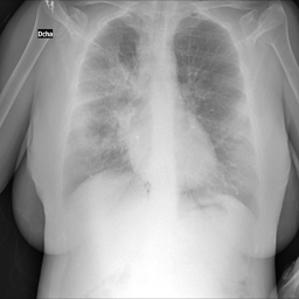

In [47]:
image_path = 'C:/Users/Jon/Documents/School/CS 770/covid_data/test/covid/COVID-474.jpg'#begin_path + 'test/fractured/1.jpg'
original_image = Image.open(image_path)
og_width, og_height = original_image.size
original_image

# Resizing image for optimal performance
# new_width = int(og_width * .20) # 20% of the original size
# new_height = int(og_height * .20) # 20% of the original size

# resized_img = original_image.resize((new_width, new_height))
# print('Picture of normal: \n')
# resized_img

In [48]:
# Manually preprocessing image
preprocessed_image = original_image.resize((256, 256))
preprocessed_image = np.array(preprocessed_image) / 255.0

preds = resnet_model.predict(np.expand_dims(preprocessed_image, axis = 0))
labels = subfolders

preds_class = np.argmax(preds)
preds_label = labels[preds_class]

print(f'\nPredicted Class: {preds_label}')
print(f'\nConfidence Score: {preds[0][preds_class]}')

1/1 [==============================] - 1s 553ms/step

Predicted Class: not_fractured

Confidence Score: 1.0


In [49]:
preprocessed_image

array([[[0.09411765, 0.09411765, 0.09411765],
        [0.09411765, 0.09411765, 0.09411765],
        [0.09019608, 0.09019608, 0.09019608],
        ...,
        [0.04705882, 0.04705882, 0.04705882],
        [0.05490196, 0.05490196, 0.05490196],
        [0.0627451 , 0.0627451 , 0.0627451 ]],

       [[0.09803922, 0.09803922, 0.09803922],
        [0.09411765, 0.09411765, 0.09411765],
        [0.09411765, 0.09411765, 0.09411765],
        ...,
        [0.04705882, 0.04705882, 0.04705882],
        [0.05490196, 0.05490196, 0.05490196],
        [0.0627451 , 0.0627451 , 0.0627451 ]],

       [[0.10196078, 0.10196078, 0.10196078],
        [0.09803922, 0.09803922, 0.09803922],
        [0.09803922, 0.09803922, 0.09803922],
        ...,
        [0.05490196, 0.05490196, 0.05490196],
        [0.05490196, 0.05490196, 0.05490196],
        [0.05882353, 0.05882353, 0.05882353]],

       ...,

       [[0.09803922, 0.09803922, 0.09803922],
        [0.09803922, 0.09803922, 0.09803922],
        [0.10196078, 0

In [31]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf  # Assuming `model` is a TensorFlow/Keras model
from sklearn.metrics import classification_report
from collections import Counter

# Load your model (ensure you have it defined or loaded elsewhere)
model = tf.keras.models.load_model(begin_path + 'bone_fracture_resnet_v1.h5')  # Update with actual model path

# Define the folder containing images
folder_path = begin_path + 'test/not_fractured'  # Update with your folder path
labels = subfolders  # Assuming labels are subfolder names


output = []
# Iterate through all image files in the folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
        image_path = os.path.join(folder_path, filename)

        # Open and preprocess the image
        original_image = Image.open(image_path)
        preprocessed_image = original_image.resize((256, 256))
        preprocessed_image = np.array(preprocessed_image) / 255.0

        # Make prediction
        preds = model.predict(np.expand_dims(preprocessed_image, axis=0))
        
        preds_class = np.argmax(preds)
        preds_label = labels[preds_class]
        output.append(preds_label)
        # # Print results
        # print(f'\nImage: {filename}')
        # print(f'Predicted Class: {preds_label}')
        # print(f'Confidence Score: {preds[0][preds_class]}')
counts = Counter(output)
TP = counts['not_fractured']
FN = counts['fractured']

folder_path = begin_path + 'test/fractured'  # Update with your folder path
labels = subfolders  # Assuming labels are subfolder names


output = []
# Iterate through all image files in the folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
        image_path = os.path.join(folder_path, filename)

        # Open and preprocess the image
        original_image = Image.open(image_path)
        preprocessed_image = original_image.resize((256, 256))
        preprocessed_image = np.array(preprocessed_image) / 255.0

        # Make prediction
        preds = model.predict(np.expand_dims(preprocessed_image, axis=0))
        
        preds_class = np.argmax(preds)
        preds_label = labels[preds_class]
        output.append(preds_label)
        # # Print results
        # print(f'\nImage: {filename}')
        # print(f'Predicted Class: {preds_label}')
        # print(f'Confidence Score: {preds[0][preds_class]}')
counts = Counter(output)
TN = counts['fractured']
FP = counts['not_fractured']

# Reconstruct y_true and y_pred
y_true = np.array([0] * (TN + FP) + [1] * (TP + FN))  # First class 0, then class 1
y_pred = np.array([0] * TN + [1] * FP + [0] * FN + [1] * TP)  # Predictions based on confusion matrix

# Generate classification report
print(classification_report(y_true, y_pred))

1/1 [==============================] - 0s 92ms/step


InvalidArgumentError: Graph execution error:

Detected at node sequential/resnet50v2/conv1_pad/Pad defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Jon\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\Jon\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\Jon\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\Jon\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 608, in run_forever

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1936, in _run_once

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 84, in _run

  File "C:\Users\Jon\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\Jon\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\Jon\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\Jon\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\Jon\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\Jon\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\Jon\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\Jon\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\Jon\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\Jon\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Jon\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\Jon\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\Jon\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\Jon\AppData\Local\Temp\ipykernel_32004\620611219.py", line 28, in <module>

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2631, in predict

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2416, in predict_function

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2401, in step_function

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2389, in run_step

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2357, in predict_step

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 589, in __call__

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 589, in __call__

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\zero_padding2d.py", line 149, in call

  File "c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 4041, in spatial_2d_padding

The first dimension of paddings must be the rank of inputs[4,2] [1,256,256]
	 [[{{node sequential/resnet50v2/conv1_pad/Pad}}]] [Op:__inference_predict_function_53949]

In [ ]:
#

In [ ]:
#%pip install pydot_ng

In [ ]:
#%pip install pydot

In [ ]:
%pip list

In [ ]:
import tensorflow.compat

In [ ]:
#%pip install jax==0.4.28
%pip install jax==0.5.1
# %pip install keras==2.14.0
# %pip install tensorflow.compat==2.16.1
